# Practice Data Analysis of the 2024 MLB season
- data from https://www.retrosheet.org/schedule/index.html
    - The information used here was obtained free of
      charge from and is copyrighted by Retrosheet.
      Interested parties may contact Retrosheet at
      20 Sunset Rd., Newark, DE 19711.

### Data Description: Field(s)   Meaning
1. Date in the form "yyyymmdd"
2. Number of game:
    - "0" - a single game
    - "1" - the first game of a double header including separate admission doubleheaders
    - "2" - the second game of a double header including separate admission doubleheaders
3. day of week ("Sun","Mon","Tue","Wed","Thur","Fri","Sat")
4. visiting team
5. visiting team league
6. season game number for visiting team
7. home team
8. home team league
9. season game number for home team
10. day (D), night (N), afternoon (A), evening (E for twinight)
11. location
12. postponement/cancellation indicator
13. date of makeup if played in the form "yyyymmdd"

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/andrewbadzioch/Desktop/MLB_stuff/data/2024schedule.csv')

In [3]:
schedule = df.copy()
schedule.head()

,Date,Num,Day,Visitor,League,Game,Home,League.1,Game.1,Day/Night,Location,Postponed,Makeup
0,20240320,0,Wednesday,LAN,NL,1,SDN,NL,1,n,SEO01,NaN,NaN
1,20240321,0,Thursday,SDN,NL,2,LAN,NL,2,n,SEO01,NaN,NaN
2,20240328,0,Thursday,MIL,NL,1,NYN,NL,1,d,NYC20,NaN,NaN
3,20240328,0,Thursday,ANA,AL,1,BAL,AL,1,d,BAL12,NaN,NaN
4,20240328,0,Thursday,ATL,NL,1,PHI,NL,1,d,PHI13,NaN,NaN


In [4]:
schedule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2430 non-null   int64  
 1   Num        2430 non-null   int64  
 2   Day        2430 non-null   object 
 3   Visitor    2430 non-null   object 
 4   League     2430 non-null   object 
 5   Game       2430 non-null   int64  
 6   Home       2430 non-null   object 
 7   League.1   2430 non-null   object 
 8   Game.1     2430 non-null   int64  
 9   Day/Night  2430 non-null   object 
 10  Location   2430 non-null   object 
 11  Postponed  0 non-null      float64
 12  Makeup     0 non-null      float64
dtypes: float64(2), int64(4), object(7)
memory usage: 246.9+ KB


**Working with Attributes**
- shape
- size
- columns
- dtypes
- ndim

In [5]:
schedule.shape

(2430, 13)

In [6]:
schedule.size

31590

In [7]:
schedule.columns

Index(['Date', 'Num', 'Day', 'Visitor', 'League', 'Game', 'Home', 'League.1',
       'Game.1', 'Day/Night', 'Location', 'Postponed', 'Makeup'],
      dtype='object')

In [8]:
schedule.dtypes

Date           int64
Num            int64
Day           object
Visitor       object
League        object
Game           int64
Home          object
League.1      object
Game.1         int64
Day/Night     object
Location      object
Postponed    float64
Makeup       float64
dtype: object

In [9]:
schedule.ndim

2

In [10]:
# index location: .iloc[]
# remember that the index location will vary slightly from actual location
schedule.iloc[455]

Date         20240430
Num                 0
Day           Tuesday
Visitor           ATL
League             NL
Game               30
Home              SEA
League.1           AL
Game.1             30
Day/Night           n
Location        SEA03
Postponed         NaN
Makeup            NaN
Name: 455, dtype: object

In [11]:
# finding the total number of games played at each stadium using a Series
# total regular season games played = 162
schedule['Location'].value_counts()

Location
WAS11    81
OAK01    81
CLE08    81
TOR02    81
ANA01    81
ATL03    81
SFO03    81
PIT08    81
NYC21    81
MIN04    81
MIL06    81
CHI11    81
PHO01    81
SEA03    81
ARL03    81
MIA02    81
BAL12    81
CHI12    81
CIN09    81
HOU03    81
KAN06    81
BOS07    81
STP01    81
STL10    80
SAN02    80
NYC20    80
PHI13    80
LOS03    80
DET05    80
DEN02    79
LON01     2
SEO01     2
MEX02     2
BIR01     1
WIL02     1
Name: count, dtype: int64

In [12]:
# finding specific things about a certain thing
schedule.value_counts([schedule['Location'] == 'LOS03'])

Location
False       2350
True          80
Name: count, dtype: int64

In [13]:
# filtering within a Series
schedule[schedule['Location'] == 'LOS03']

,Date,Num,Day,Visitor,League,Game,Home,League.1,Game.1,Day/Night,Location,Postponed,Makeup
12,20240328,0,Thursday,SLN,NL,1,LAN,NL,3,d,LOS03,NaN,NaN
24,20240329,0,Friday,SLN,NL,2,LAN,NL,4,n,LOS03,NaN,NaN
38,20240330,0,Saturday,SLN,NL,3,LAN,NL,5,n,LOS03,NaN,NaN
54,20240331,0,Sunday,SLN,NL,4,LAN,NL,6,d,LOS03,NaN,NaN
68,20240401,0,Monday,SFN,NL,5,LAN,NL,7,n,LOS03,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,20240921,0,Saturday,COL,NL,155,LAN,NL,155,n,LOS03,NaN,NaN
2341,20240922,0,Sunday,COL,NL,156,LAN,NL,156,d,LOS03,NaN,NaN
2360,20240924,0,Tuesday,SDN,NL,157,LAN,NL,157,n,LOS03,NaN,NaN
2375,20240925,0,Wednesday,SDN,NL,158,LAN,NL,158,n,LOS03,NaN,NaN


In [14]:
schedule.value_counts([schedule['Location'] == 'HOU03'])

Location
False       2349
True          81
Name: count, dtype: int64

In [15]:
schedule[schedule['Location'] == 'HOU03']

,Date,Num,Day,Visitor,League,Game,Home,League.1,Game.1,Day/Night,Location,Postponed,Makeup
7,20240328,0,Thursday,NYA,AL,1,HOU,AL,1,d,HOU03,NaN,NaN
19,20240329,0,Friday,NYA,AL,2,HOU,AL,2,n,HOU03,NaN,NaN
35,20240330,0,Saturday,NYA,AL,3,HOU,AL,3,n,HOU03,NaN,NaN
47,20240331,0,Sunday,NYA,AL,4,HOU,AL,4,d,HOU03,NaN,NaN
63,20240401,0,Monday,TOR,AL,5,HOU,AL,5,n,HOU03,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,20240921,0,Saturday,ANA,AL,155,HOU,AL,155,n,HOU03,NaN,NaN
2333,20240922,0,Sunday,ANA,AL,156,HOU,AL,156,d,HOU03,NaN,NaN
2344,20240923,0,Monday,SEA,AL,157,HOU,AL,157,n,HOU03,NaN,NaN
2356,20240924,0,Tuesday,SEA,AL,158,HOU,AL,158,n,HOU03,NaN,NaN


In [16]:
schedule[schedule['Location'] == 'SEO01']

,Date,Num,Day,Visitor,League,Game,Home,League.1,Game.1,Day/Night,Location,Postponed,Makeup
0,20240320,0,Wednesday,LAN,NL,1,SDN,NL,1,n,SEO01,NaN,NaN
1,20240321,0,Thursday,SDN,NL,2,LAN,NL,2,n,SEO01,NaN,NaN


In [17]:
schedule[schedule['Location'] == 'MEX02']

,Date,Num,Day,Visitor,League,Game,Home,League.1,Game.1,Day/Night,Location,Postponed,Makeup
405,20240427,0,Saturday,HOU,AL,27,COL,NL,27,d,MEX02,NaN,NaN
423,20240428,0,Sunday,HOU,AL,28,COL,NL,28,d,MEX02,NaN,NaN


In [18]:
df1 = pd.read_csv('/Users/andrewbadzioch/Desktop/MLB_stuff/data/batterStat2024.csv')
df1.head()

,"last_name, first_name",player_id,year,player_age,ab,pa,hit,single,double,triple,...,blasts_contact,blasts_swing,squared_up_contact,squared_up_swing,avg_swing_length,swords,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate
0,"Guerrero Jr., Vladimir",665489,2024,25,616,697,199,124,44,1,...,24.2,19.4,34.5,27.7,7.7,9,93.8,7.4,35.1,13.7
1,"Ramírez, José",608070,2024,31,620,682,173,93,39,2,...,13.9,12.1,32.6,28.3,7.3,17,89.2,19.6,34.0,8.6
2,"Hoskins, Rhys",656555,2024,31,449,517,96,56,14,0,...,12.0,9.1,29.8,22.8,8.1,23,88.7,20.8,29.7,12.7
3,"Gelof, Zack",680869,2024,24,497,547,105,66,20,2,...,12.0,7.8,30.4,19.8,7.3,23,89.2,14.2,34.4,8.8
4,"Varsho, Daulton",662139,2024,27,459,513,98,52,21,7,...,11.1,8.2,24.0,17.7,7.6,6,86.1,24.4,30.2,6.2


In [19]:
batter = df1.copy()

In [20]:
batter.set_index('last_name, first_name', inplace=True)
batter.head()

,player_id,year,player_age,ab,pa,hit,single,double,triple,home_run,...,blasts_contact,blasts_swing,squared_up_contact,squared_up_swing,avg_swing_length,swords,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate
"last_name, first_name",,,,,,,,,,,,,,,,,,,,,
"Guerrero Jr., Vladimir",665489,2024,25,616,697,199,124,44,1,30,...,24.2,19.4,34.5,27.7,7.7,9,93.8,7.4,35.1,13.7
"Ramírez, José",608070,2024,31,620,682,173,93,39,2,39,...,13.9,12.1,32.6,28.3,7.3,17,89.2,19.6,34.0,8.6
"Hoskins, Rhys",656555,2024,31,449,517,96,56,14,0,26,...,12.0,9.1,29.8,22.8,8.1,23,88.7,20.8,29.7,12.7
"Gelof, Zack",680869,2024,24,497,547,105,66,20,2,17,...,12.0,7.8,30.4,19.8,7.3,23,89.2,14.2,34.4,8.8
"Varsho, Daulton",662139,2024,27,459,513,98,52,21,7,18,...,11.1,8.2,24.0,17.7,7.6,6,86.1,24.4,30.2,6.2


In [21]:
batter.shape

(129, 36)

In [22]:
batter.iloc[58]

player_id             691026.000
year                    2024.000
player_age                22.000
ab                       587.000
pa                       637.000
hit                      157.000
single                   105.000
double                    32.000
triple                     5.000
home_run                  15.000
strikeout                109.000
walk                      41.000
k_percent                 17.100
bb_percent                 6.400
batting_avg                0.267
slg_percent                0.416
on_base_percent            0.314
on_base_plus_slg           0.730
xba                        0.259
xslg                       0.366
woba                       0.315
xwoba                      0.296
xobp                       0.308
xiso                       0.107
avg_swing_speed           70.200
fast_swing_rate           11.500
blasts_contact            12.000
blasts_swing               9.900
squared_up_contact        32.200
squared_up_swing          26.500
avg_swing_

In [23]:
batter.loc['Bregman, Alex']

player_id             608324.000
year                    2024.000
player_age                30.000
ab                       581.000
pa                       634.000
hit                      151.000
single                    93.000
double                    30.000
triple                     2.000
home_run                  26.000
strikeout                 86.000
walk                      44.000
k_percent                 13.600
bb_percent                 6.900
batting_avg                0.260
slg_percent                0.453
on_base_percent            0.315
on_base_plus_slg           0.768
xba                        0.262
xslg                       0.428
woba                       0.331
xwoba                      0.323
xobp                       0.318
xiso                       0.167
avg_swing_speed           71.400
fast_swing_rate           11.800
blasts_contact            13.300
blasts_swing              11.900
squared_up_contact        37.900
squared_up_swing          33.800
avg_swing_

In [24]:
batter.sort_values('home_run', ascending=False)

,player_id,year,player_age,ab,pa,hit,single,double,triple,home_run,...,blasts_contact,blasts_swing,squared_up_contact,squared_up_swing,avg_swing_length,swords,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate
"last_name, first_name",,,,,,,,,,,,,,,,,,,,,
"Judge, Aaron",592450,2024,32,559,704,180,85,36,1,58,...,25.4,17.9,33.5,23.6,8.2,16,96.2,19.0,40.8,26.9
"Ohtani, Shohei",660271,2024,29,636,731,197,98,38,7,54,...,25.4,17.9,37.5,26.4,7.8,10,95.8,16.2,37.8,21.5
"Santander, Anthony",623993,2024,29,595,665,140,69,25,2,44,...,13.7,11.0,27.6,22.3,7.2,7,89.8,22.7,35.0,11.7
"Soto, Juan",665742,2024,25,576,713,166,90,31,4,41,...,25.9,21.0,39.7,32.1,7.3,30,94.2,10.7,35.4,19.7
"Ramírez, José",608070,2024,31,620,682,173,93,39,2,39,...,13.9,12.1,32.6,28.3,7.3,17,89.2,19.6,34.0,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Turang, Brice",668930,2024,24,559,619,142,107,24,4,7,...,6.2,5.4,33.8,29.2,6.1,12,87.0,6.1,32.0,2.4
"Hoerner, Nico",663538,2024,27,582,641,159,116,35,1,7,...,7.2,6.4,35.4,31.7,7.1,11,85.7,10.4,36.0,1.2
"Arraez, Luis",650333,2024,27,637,672,200,161,32,3,4,...,4.9,4.6,46.5,43.9,6.0,8,86.3,13.7,40.9,1.6


In [25]:
batter.loc['Ohtani, Shohei']

player_id             660271.000
year                    2024.000
player_age                29.000
ab                       636.000
pa                       731.000
hit                      197.000
single                    98.000
double                    38.000
triple                     7.000
home_run                  54.000
strikeout                162.000
walk                      81.000
k_percent                 22.200
bb_percent                11.100
batting_avg                0.310
slg_percent                0.646
on_base_percent            0.390
on_base_plus_slg           1.036
xba                        0.320
xslg                       0.678
woba                       0.431
xwoba                      0.448
xobp                       0.401
xiso                       0.358
avg_swing_speed           76.300
fast_swing_rate           64.200
blasts_contact            25.400
blasts_swing              17.900
squared_up_contact        37.500
squared_up_swing          26.400
avg_swing_

In [26]:
batter.dtypes

player_id               int64
year                    int64
player_age              int64
ab                      int64
pa                      int64
hit                     int64
single                  int64
double                  int64
triple                  int64
home_run                int64
strikeout               int64
walk                    int64
k_percent             float64
bb_percent            float64
batting_avg           float64
slg_percent           float64
on_base_percent       float64
on_base_plus_slg      float64
xba                   float64
xslg                  float64
woba                  float64
xwoba                 float64
xobp                  float64
xiso                  float64
avg_swing_speed       float64
fast_swing_rate       float64
blasts_contact        float64
blasts_swing          float64
squared_up_contact    float64
squared_up_swing      float64
avg_swing_length      float64
swords                  int64
exit_velocity_avg     float64
launch_ang

In [27]:
batter1 = batter[['ab', 'pa', 'hit', 'home_run', 'batting_avg', 'slg_percent', 'on_base_percent', 'avg_swing_speed', 'blasts_swing', 'blasts_contact']]
batter1.head()

,ab,pa,hit,home_run,batting_avg,slg_percent,on_base_percent,avg_swing_speed,blasts_swing,blasts_contact
"last_name, first_name",,,,,,,,,,
"Guerrero Jr., Vladimir",616,697,199,30,0.323,0.544,0.396,75.9,19.4,24.2
"Ramírez, José",620,682,173,39,0.279,0.537,0.335,71.6,12.1,13.9
"Hoskins, Rhys",449,517,96,26,0.214,0.419,0.303,71.2,9.1,12.0
"Gelof, Zack",497,547,105,17,0.211,0.362,0.270,71.6,7.8,12.0
"Varsho, Daulton",459,513,98,18,0.214,0.407,0.293,73.7,8.2,11.1


In [28]:
batter1.corr()

,ab,pa,hit,home_run,batting_avg,slg_percent,on_base_percent,avg_swing_speed,blasts_swing,blasts_contact
ab,1.000000,0.946320,0.798816,0.341518,0.287826,0.262149,0.131094,0.154493,0.219975,0.224741
pa,0.946320,1.000000,0.756374,0.470357,0.273206,0.367482,0.338598,0.230264,0.297650,0.299958
hit,0.798816,0.756374,1.000000,0.399222,0.802924,0.583092,0.536346,0.173207,0.369875,0.336172
home_run,0.341518,0.470357,0.399222,1.000000,0.295960,0.865484,0.493695,0.628126,0.612132,0.665048
batting_avg,0.287826,0.273206,0.802924,0.295960,1.000000,0.667860,0.728672,0.117393,0.373556,0.311737
slg_percent,0.262149,0.367482,0.583092,0.865484,0.667860,1.000000,0.727149,0.568707,0.670465,0.677551
on_base_percent,0.131094,0.338598,0.536346,0.493695,0.728672,0.727149,1.000000,0.252838,0.441306,0.393981
avg_swing_speed,0.154493,0.230264,0.173207,0.628126,0.117393,0.568707,0.252838,1.000000,0.815120,0.878439
blasts_swing,0.219975,0.297650,0.369875,0.612132,0.373556,0.670465,0.441306,0.815120,1.000000,0.969569
blasts_contact,0.224741,0.299958,0.336172,0.665048,0.311737,0.677551,0.393981,0.878439,0.969569,1.000000


<Axes: >

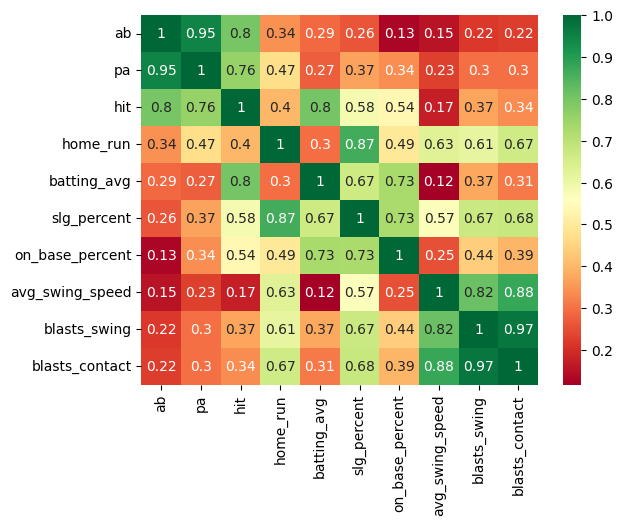

In [29]:
sns.heatmap(batter1.corr(), cmap='RdYlGn', annot=True)

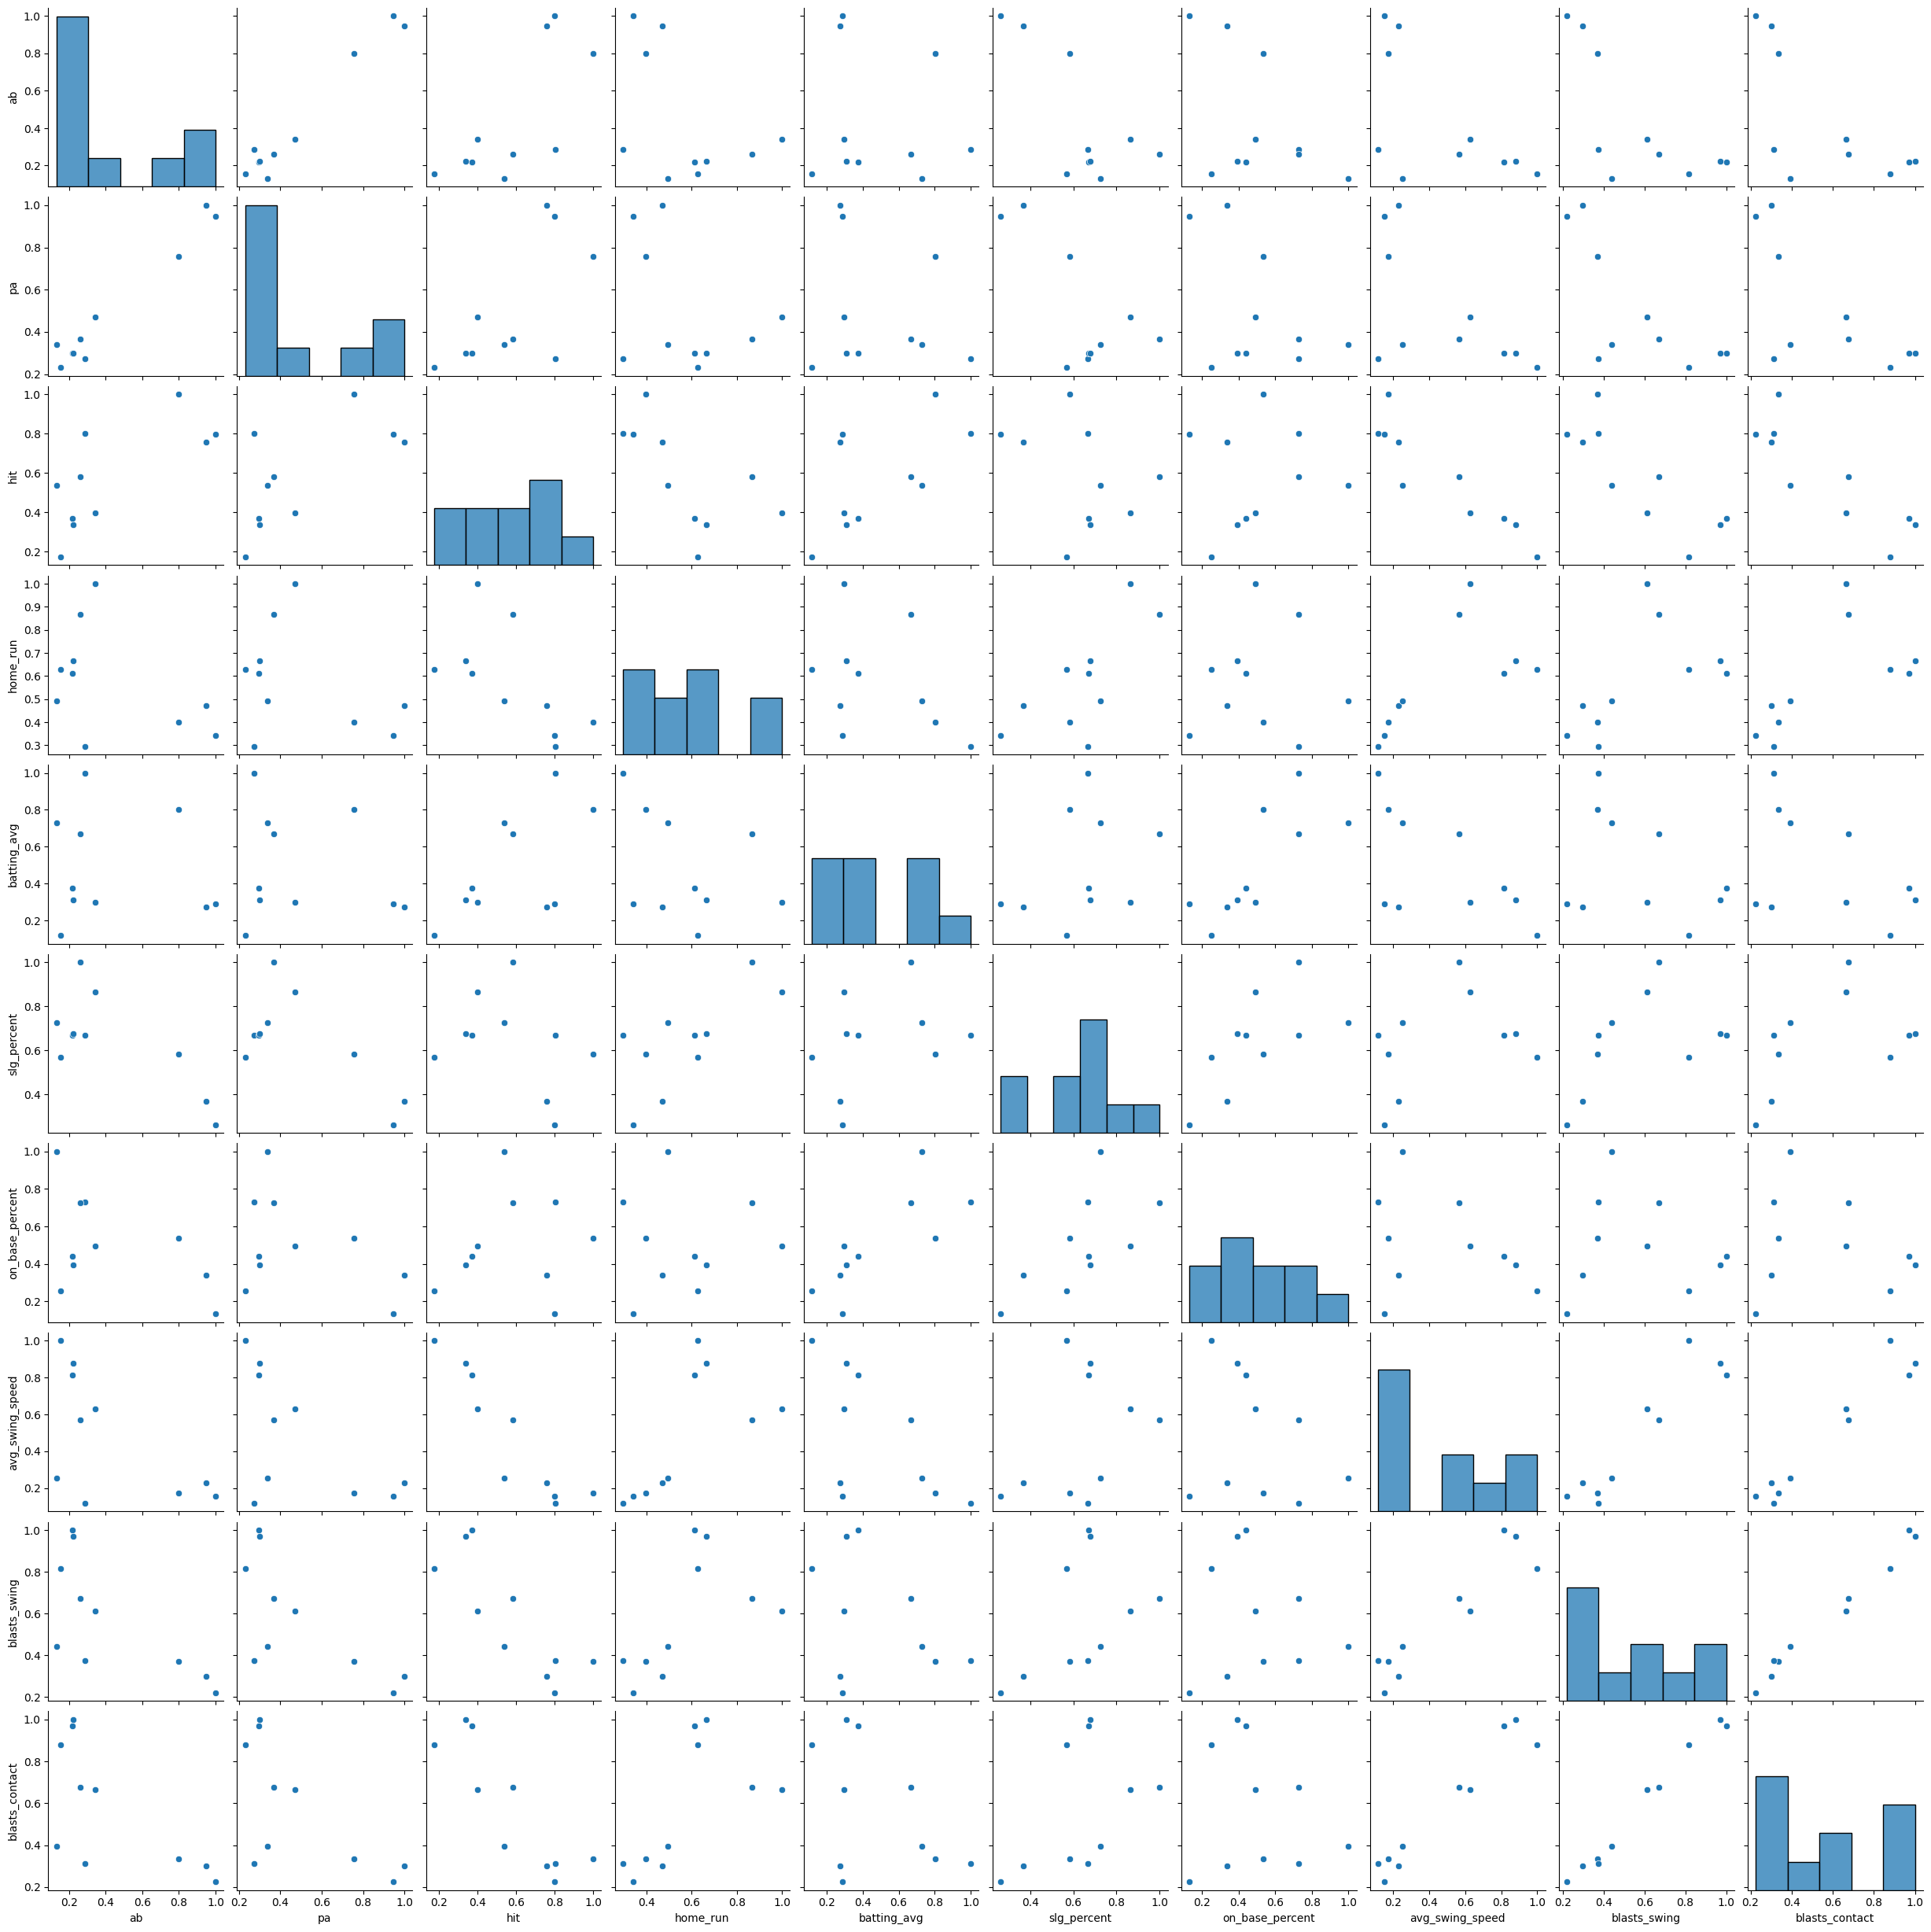

In [30]:
sns.pairplot(batter1.corr())